In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

<h4>IMPORT DATASET</h4>

In [2]:
path = 'https://raw.githubusercontent.com/jebandong/dataset/main/used_device_data.csv'

In [3]:
df = pd.read_csv(path)
df.head(10)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


In [4]:
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [5]:
df.dtypes

device_brand              object
os                        object
screen_size              float64
4g                        object
5g                        object
rear_camera_mp           float64
front_camera_mp          float64
internal_memory          float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

In [6]:
df.describe(include = 'all')

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<h1>HANDLING OF MISSING VALUES</h1>

In [8]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<h3>Analysis of Methods for Handling Missing Data</h3>
Examining the differences between methods and determining the most effective approach for handling missing data.

In [9]:
df[['rear_camera_mp','front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']].mean()

rear_camera_mp        9.460208
front_camera_mp       6.554229
internal_memory      54.573099
ram                   4.036122
battery            3133.402697
weight              182.751871
dtype: float64

In [10]:
df[['rear_camera_mp','front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']].median()

rear_camera_mp        8.0
front_camera_mp       5.0
internal_memory      32.0
ram                   4.0
battery            3000.0
weight              160.0
dtype: float64

In [11]:
df[['rear_camera_mp','front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']].mode()

,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight
0,13.0,5.0,16.0,4.0,4000.0,150.0


In [12]:
df[['rear_camera_mp','front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']].value_counts().idxmax()

(13.0, 16.0, 64.0, 4.0, 4000.0, 196.8)

In [13]:
df[['rear_camera_mp','front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']].min()

rear_camera_mp       0.08
front_camera_mp      0.00
internal_memory      0.01
ram                  0.02
battery            500.00
weight              69.00
dtype: float64

In [14]:
df[['rear_camera_mp','front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight']].max()

rear_camera_mp       48.0
front_camera_mp      32.0
internal_memory    1024.0
ram                  12.0
battery            9720.0
weight              855.0
dtype: float64

In [15]:
#missing_data = df.isnull().sum().sort_values(ascending = False)
#missing_data


<h3>REPLACING THE MISSING DATA</h3>

Replace the missing data by getting the most frequent value of <b>"rear_camera_mp"</b>

In [16]:
df["rear_camera_mp"].replace(np.nan, 13.0 , inplace = True )
df["rear_camera_mp"].isnull().sum()

0

Replace the missing data by getting the most frequent value of <b>"front_camera_mp"</b>

In [17]:
df["front_camera_mp"].replace(np.nan, 5.0, inplace = True )
df["front_camera_mp"].isnull().sum()

0

Replace the missing data by getting the most frequent value of <b>"internal_memory"</b>

In [18]:
df["internal_memory"].replace(np.nan, 16.0, inplace = True )
df["internal_memory"].isnull().sum()

0

Replace the missing data by getting the most frequent value of <b>"ram"</b>

In [19]:
df["ram"].replace(np.nan, 4.0, inplace = True )
df["ram"].isnull().sum()

0

Replace the missing data by getting the mean of <b>"battery"</b>

In [20]:
df["battery"].replace(np.nan, 3133.402697, inplace = True )
df["battery"].isnull().sum()

0

Replace the missing data by getting the mean of <b>"weight"</b>

In [21]:
df["weight"].replace(np.nan,  182.751871, inplace = True )
df["weight"].isnull().sum()

0

<h4>Validating no missing data</h4>

In [22]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<h1>DATA NORMALIZATION</h1>

In [23]:
df['screen_size'] = df['screen_size']/df['screen_size'].max()
df['rear_camera_mp'] = df['rear_camera_mp']/df['rear_camera_mp'].max()
df['front_camera_mp'] = df['front_camera_mp']/df['front_camera_mp'].max()
df['internal_memory'] = df['internal_memory']/df['internal_memory'].max()
df['ram'] = df['ram']/df['ram'].max()
df['battery'] = df['battery']/df['battery'].max()
df['weight'] = df['weight']/df['weight'].max()
df['release_year'] = df['release_year']/df['release_year'].max()
df['days_used'] = df['days_used']/df['days_used'].max()

df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,0.472159,yes,no,0.270833,0.15625,0.062500,0.250000,0.310700,0.170760,1.000000,0.116088,4.307572,4.715100
1,Honor,Android,0.563334,yes,yes,0.270833,0.50000,0.125000,0.666667,0.442387,0.249123,1.000000,0.297075,5.162097,5.519018
2,Honor,Android,0.543471,yes,yes,0.270833,0.25000,0.125000,0.666667,0.432099,0.249123,1.000000,0.148080,5.111084,5.884631
3,Honor,Android,0.830348,yes,yes,0.270833,0.25000,0.062500,0.500000,0.745885,0.561404,1.000000,0.315356,5.135387,5.630961
4,Honor,Android,0.498860,yes,no,0.270833,0.25000,0.062500,0.250000,0.514403,0.216374,1.000000,0.267824,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,0.499512,yes,no,0.270833,0.25000,0.062500,0.500000,0.514403,0.222222,0.999505,0.212066,4.492337,6.483872
3450,Asus,Android,0.496255,yes,no,0.270833,0.25000,0.125000,0.666667,0.411523,0.233918,0.999010,0.494516,5.037732,6.251538
3451,Alcatel,Android,0.514490,yes,no,0.270833,0.15625,0.031250,0.250000,0.411523,0.192982,1.000000,0.183729,4.357350,4.528829
3452,Alcatel,Android,0.514490,yes,no,0.270833,0.15625,0.031250,0.166667,0.411523,0.187135,1.000000,0.136197,4.349762,4.624188


<h1>CORRELATION OF  DATA</h1>
Pearson's Correlation

In [24]:
%%capture
! pip install seaborn

In [25]:
%matplotlib inline 

In [26]:
# To determine the correlation between variables
df.corr(numeric_only = True)

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.168353,0.271615,0.072195,0.273810,0.811192,0.828743,0.364223,-0.291723,0.614785,0.460889
rear_camera_mp,0.168353,1.000000,0.438985,0.040689,0.266467,0.272401,-0.083351,0.384425,-0.191985,0.590368,0.535344
front_camera_mp,0.271615,0.438985,1.000000,0.296713,0.477191,0.369562,-0.004970,0.690661,-0.552377,0.607548,0.474444
internal_memory,0.072195,0.040689,0.296713,1.000000,0.123406,0.118358,0.015398,0.235097,-0.242279,0.191520,0.196537
ram,0.273810,0.266467,0.477191,0.123406,1.000000,0.280135,0.089893,0.313829,-0.279737,0.518783,0.530363
battery,0.811192,0.272401,0.369562,0.118358,0.280135,1.000000,0.699590,0.488387,-0.370416,0.611962,0.469685
weight,0.828743,-0.083351,-0.004970,0.015398,0.089893,0.699590,1.000000,0.071278,-0.067413,0.382143,0.269263
release_year,0.364223,0.384425,0.690661,0.235097,0.313829,0.488387,0.071278,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.191985,-0.552377,-0.242279,-0.279737,-0.370416,-0.067413,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.590368,0.607548,0.191520,0.518783,0.611962,0.382143,0.509790,-0.358264,1.000000,0.834496


<h1>Analysis For SCREEN SIZE</h1>

(0.0, 6.8735612911)

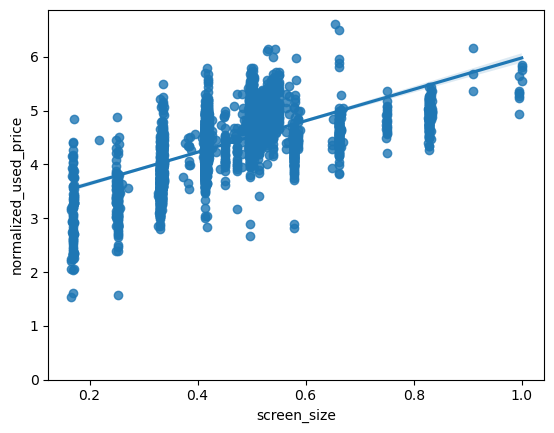

In [27]:
sns.regplot(x = "screen_size", y = "normalized_used_price", data = df)
plt.ylim(0,)

In [28]:
df[["screen_size", "normalized_used_price"]].corr()

,screen_size,normalized_used_price
screen_size,1.000000,0.614785
normalized_used_price,0.614785,1.000000


In [29]:
# To calculate the Pearson Correlation Coefficient and the P-Value between screen size and price
pearson_coefficient, p_value = stats.pearsonr(df["screen_size"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is 0.6147847018380188 with a P-value of 0.0


<h1>Analysis For REAR CAMERA MP</h1>

(0.0, 7.656763723117129)

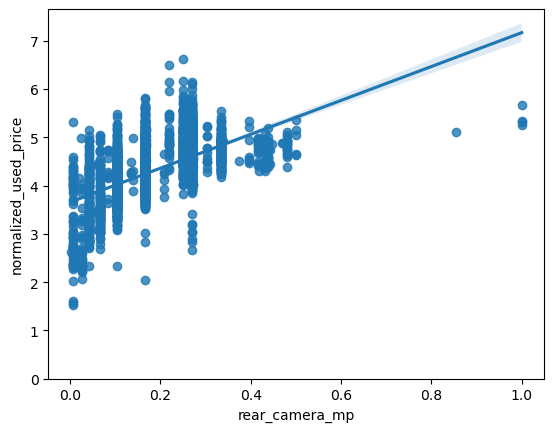

In [30]:
sns.regplot(x = "rear_camera_mp", y = "normalized_used_price", data = df)
plt.ylim(0,)

In [31]:
df[["rear_camera_mp", "normalized_used_price"]].corr()

,rear_camera_mp,normalized_used_price
rear_camera_mp,1.000000,0.590368
normalized_used_price,0.590368,1.000000


In [32]:
# To calculate the Pearson Correlation Coefficient and the P-Value between rear camera mp and price
pearson_coefficient, p_value = stats.pearsonr(df["rear_camera_mp"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is 0.590367750564414 with a P-value of 1e-323


<h1>Analysis For FRONT CAMERA MP</h1>

(0.0, 6.8735612911)

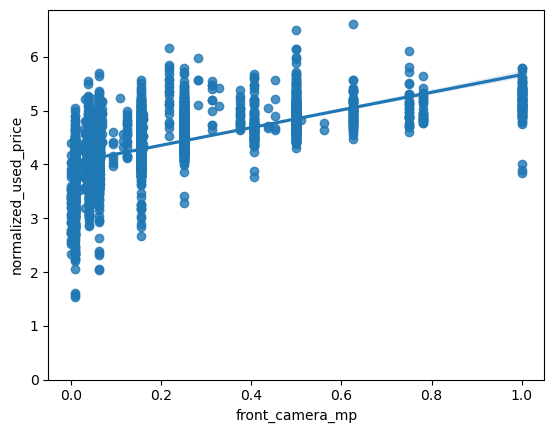

In [33]:
sns.regplot(x = "front_camera_mp", y = "normalized_used_price", data = df)
plt.ylim(0,)

In [34]:
df[["front_camera_mp", "normalized_used_price"]].corr()

,front_camera_mp,normalized_used_price
front_camera_mp,1.000000,0.607548
normalized_used_price,0.607548,1.000000


In [35]:
# To calculate the Pearson Correlation Coefficient and the P-Value between front camera mp and price
pearson_coefficient, p_value = stats.pearsonr(df["front_camera_mp"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is 0.6075479413450074 with a P-value of 0.0


<h1>Analysis For INTERNAL MEMORY</h1>

(0.0, 6.8735612911)

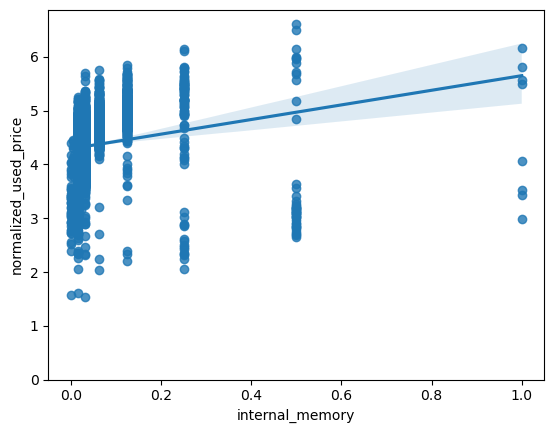

In [36]:
sns.regplot(x = "internal_memory", y = "normalized_used_price", data = df)
plt.ylim(0,)

In [37]:
df[["internal_memory", "normalized_used_price"]].corr()

,internal_memory,normalized_used_price
internal_memory,1.00000,0.19152
normalized_used_price,0.19152,1.00000


In [38]:
# To calculate the Pearson Correlation Coefficient and the P-Value between internal memory and price
pearson_coefficient, p_value = stats.pearsonr(df["internal_memory"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is 0.191520043629971 with a P-value of 6.846835476118925e-30


<h1>Analysis For RAM</h1>

(0.0, 6.8735612911)

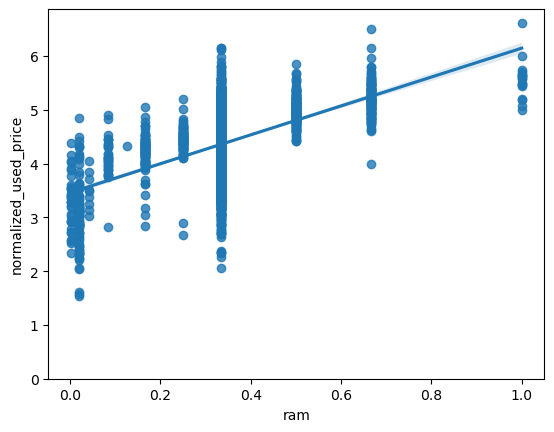

In [39]:
sns.regplot(x = "ram", y = "normalized_used_price", data = df)
plt.ylim(0,)

In [40]:
df[["ram", "normalized_used_price"]].corr()

,ram,normalized_used_price
ram,1.000000,0.518783
normalized_used_price,0.518783,1.000000


In [41]:
# To calculate the Pearson Correlation Coefficient and the P-Value between ram and price
pearson_coefficient, p_value = stats.pearsonr(df["ram"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is 0.5187828975342947 with a P-value of 2.510616951660657e-237


<h1>Analysis For BATTERY</h1>

(0.0, 6.8735612911)

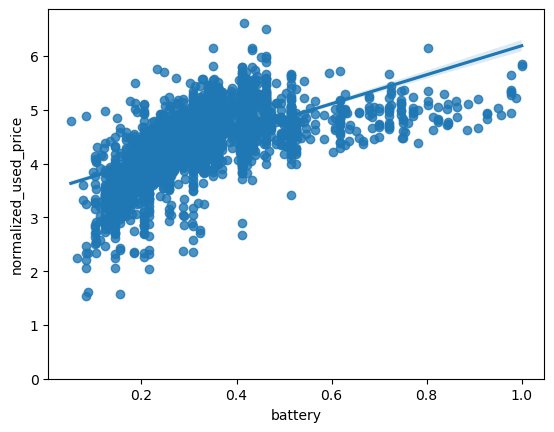

In [42]:
sns.regplot(x = "battery", y = "normalized_used_price", data = df)
plt.ylim(0,)

In [43]:
df[["battery", "normalized_used_price"]].corr()

,battery,normalized_used_price
battery,1.000000,0.611962
normalized_used_price,0.611962,1.000000


In [44]:
# To calculate the Pearson Correlation Coefficient and the P-Value between battery and price
pearson_coefficient, p_value = stats.pearsonr(df["battery"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is 0.6119615939002389 with a P-value of 0.0


<h1>Analysis For WEIGHT</h1>

(0.0, 6.8735612911)

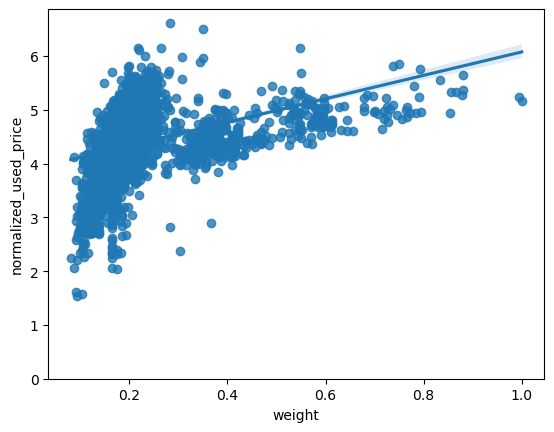

In [45]:
sns.regplot(x = "weight", y = "normalized_used_price", data = df)
plt.ylim(0,)

In [46]:
df[["weight", "normalized_used_price"]].corr()

,weight,normalized_used_price
weight,1.000000,0.382143
normalized_used_price,0.382143,1.000000


In [47]:
# To calculate the Pearson Correlation Coefficient and the P-Value between weight and price
pearson_coefficient, p_value = stats.pearsonr(df["weight"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is 0.38214302395765937 with a P-value of 1.6480811988741017e-120


<h1>Analysis For RELEASE YEAR</h1>

(0.0, 6.8735612911)

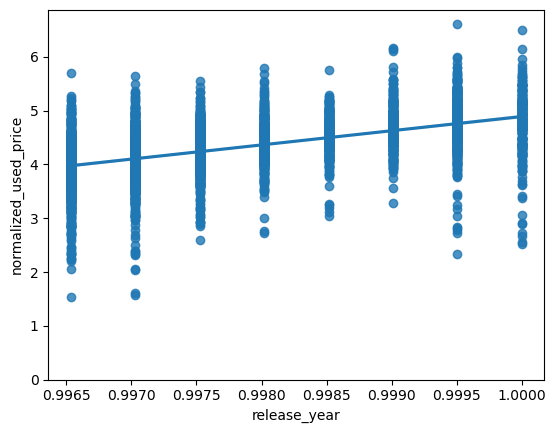

In [48]:
sns.regplot(x = "release_year", y = "normalized_used_price", data = df)
plt.ylim(0,)

In [49]:
df[["release_year", "normalized_used_price"]].corr()

,release_year,normalized_used_price
release_year,1.00000,0.50979
normalized_used_price,0.50979,1.00000


In [50]:
# To calculate the Pearson Correlation Coefficient and the P-Value between release year and price
pearson_coefficient, p_value = stats.pearsonr(df["release_year"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is 0.5097904825970494 with a P-value of 6.826542347504578e-228


<h1>Analysis For DAYS USED</h1>

(0.0, 6.8735612911)

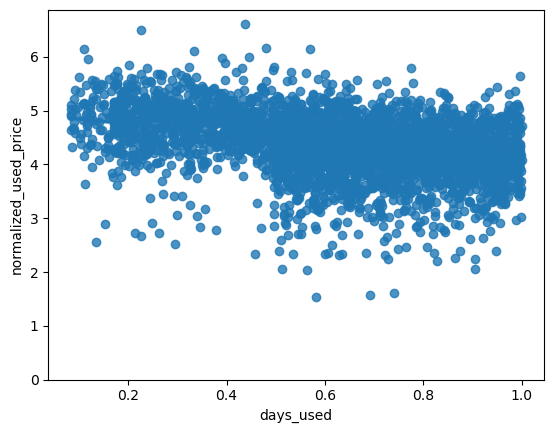

In [51]:
sns.regplot(x = "days_used", y = "normalized_used_price", data = df)
plt.ylim(0,)

In [52]:
df[["days_used", "normalized_used_price"]].corr()

,days_used,normalized_used_price
days_used,1.000000,-0.358264
normalized_used_price,-0.358264,1.000000


In [53]:
# To calculate the Pearson Correlation Coefficient and the P-Value between days used and price
pearson_coefficient, p_value = stats.pearsonr(df["days_used"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is -0.3582640944719545 with a P-value of 4.032976044241771e-105


<h1>Analysis For NORMALIZED NEW PRICE</h1>

<Axes: xlabel='normalized_new_price', ylabel='normalized_used_price'>

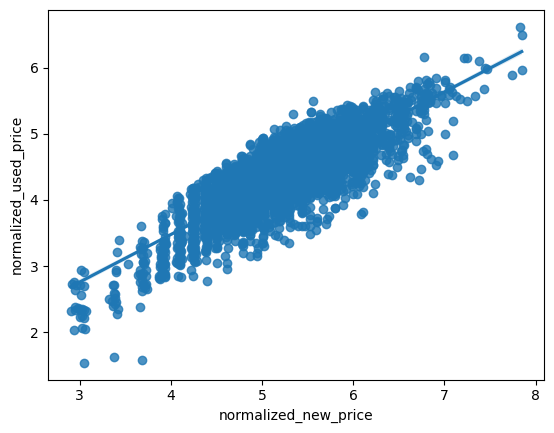

In [54]:
sns.regplot(x = "normalized_new_price", y = "normalized_used_price", data = df)

In [55]:
df[["normalized_new_price", "normalized_used_price"]].corr()

,normalized_new_price,normalized_used_price
normalized_new_price,1.000000,0.834496
normalized_used_price,0.834496,1.000000


In [56]:
# To calculate the Pearson Correlation Coefficient and the P-Value between normalized new price and price
pearson_coefficient, p_value = stats.pearsonr(df["normalized_new_price"], df["normalized_used_price"])

# To display the results
print("The Pearson Coefficient of Correlation is", pearson_coefficient, "with a P-value of", p_value)

The Pearson Coefficient of Correlation is 0.8344960187989942 with a P-value of 0.0


<h1>Analysis For DEVICE BRAND</h1>

<Axes: xlabel='device_brand', ylabel='normalized_used_price'>

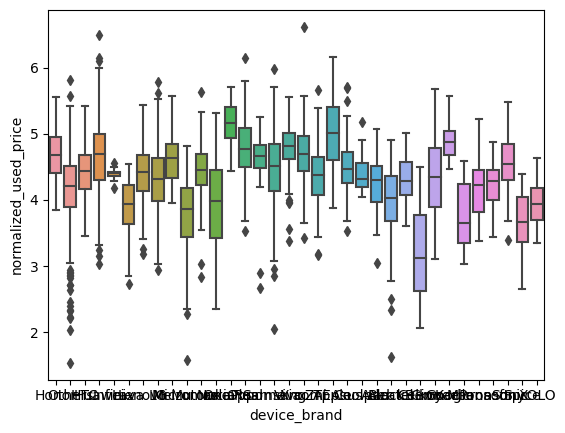

In [57]:
# Plot the boxplot between device_brand and normalized_used_price.
df["device_brand"].value_counts()

sns.boxplot(x = "device_brand", y ="normalized_used_price", data = df)
# device_brand is not predictor

In [58]:
df['device_brand'].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [59]:
df_group_device_brand = df[["device_brand", "normalized_used_price"]]
group_device_brand = df_group_device_brand.groupby(["device_brand"])

# ANOVA
honor = group_device_brand.get_group('Honor')['normalized_used_price']
others = group_device_brand.get_group('Others')['normalized_used_price']
htc = group_device_brand.get_group('HTC')['normalized_used_price']
huawei = group_device_brand.get_group('Huawei')['normalized_used_price']
infinix = group_device_brand.get_group('Infinix')['normalized_used_price']
lava = group_device_brand.get_group('Lava')['normalized_used_price']
lenovo = group_device_brand.get_group('Lenovo')['normalized_used_price']
lg = group_device_brand.get_group('LG')['normalized_used_price']
meizu = group_device_brand.get_group('Meizu')['normalized_used_price']
micromax = group_device_brand.get_group('Micromax')['normalized_used_price']
motorola = group_device_brand.get_group('Motorola')['normalized_used_price']
nokia = group_device_brand.get_group('Nokia')['normalized_used_price']
oneplus = group_device_brand.get_group('OnePlus')['normalized_used_price']
oppo = group_device_brand.get_group('Oppo')['normalized_used_price']
realme = group_device_brand.get_group('Realme')['normalized_used_price']
samsung = group_device_brand.get_group('Samsung')['normalized_used_price']
vivo = group_device_brand.get_group('Vivo')['normalized_used_price']
xiaomi = group_device_brand.get_group('Xiaomi')['normalized_used_price']
zte = group_device_brand.get_group('ZTE')['normalized_used_price']
apple = group_device_brand.get_group('Apple')['normalized_used_price']
asus = group_device_brand.get_group('Asus')['normalized_used_price']
coolpad = group_device_brand.get_group('Coolpad')['normalized_used_price']
acer = group_device_brand.get_group('Acer')['normalized_used_price']
alcatel = group_device_brand.get_group('Alcatel')['normalized_used_price']
blackberry = group_device_brand.get_group('BlackBerry')['normalized_used_price']
celkon = group_device_brand.get_group('Celkon')['normalized_used_price']
gionee = group_device_brand.get_group('Gionee')['normalized_used_price']
google = group_device_brand.get_group('Google')['normalized_used_price']
karbonn = group_device_brand.get_group('Karbonn')['normalized_used_price']
microsoft = group_device_brand.get_group('Microsoft')['normalized_used_price']
panasonic = group_device_brand.get_group('Panasonic')['normalized_used_price']
sony = group_device_brand.get_group('Sony')['normalized_used_price']
spice = group_device_brand.get_group('Spice')['normalized_used_price']
xolo = group_device_brand.get_group('XOLO')['normalized_used_price']


f_value, p_value = stats.f_oneway(honor, others, htc, huawei, infinix, lava, lenovo, lg, meizu, micromax, motorola, nokia,
                                 oneplus, oppo, realme, samsung, vivo, xiaomi, zte, apple, asus, coolpad, acer, alcatel, blackberry,
                                 celkon, gionee, google, karbonn, microsoft, panasonic, sony, spice, xolo)

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  38.79042408845584 P = 3.697117760839948e-208


In [60]:
df["device_brand"].value_counts().to_frame()

,count
device_brand,
Others,502
Samsung,341
Huawei,251
LG,201
Lenovo,171
ZTE,140
Xiaomi,132
Oppo,129
Asus,122


In [61]:
branding = df.groupby('device_brand')['normalized_new_price'].mean().reset_index().sort_values(by='normalized_new_price', ascending=False)
branding

,device_brand,normalized_new_price
2,Apple,6.339548
22,OnePlus,6.266780
8,Google,6.077932
23,Oppo,5.679682
30,Vivo,5.638037
28,Sony,5.549278
11,Huawei,5.515084
27,Samsung,5.482891
17,Meizu,5.462516
9,HTC,5.452407


In [64]:
expensive_brands = list(branding['device_brand'].iloc[:len(branding) // 3])
budget_brands = []
for x in branding['device_brand'].unique():
    if x not in expensive_brands:
        budget_brands.append(x)
        
print('expensive', expensive_brands)
print('budget', budget_brands)

expensive ['Apple', 'OnePlus', 'Google', 'Oppo', 'Vivo', 'Sony', 'Huawei', 'Samsung', 'Meizu', 'HTC', 'Asus']
budget ['Xiaomi', 'Honor', 'Gionee', 'BlackBerry', 'LG', 'ZTE', 'Motorola', 'Coolpad', 'Lenovo', 'Realme', 'Acer', 'Others', 'Panasonic', 'Microsoft', 'XOLO', 'Alcatel', 'Nokia', 'Infinix', 'Lava', 'Karbonn', 'Micromax', 'Spice', 'Celkon']


<Axes: xlabel='device_brand', ylabel='normalized_used_price'>

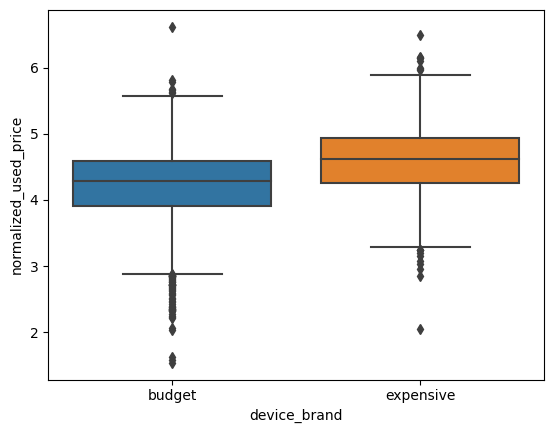

In [65]:
df['device_brand'].replace(expensive_brands, 'expensive', inplace = True )
df['device_brand'].replace(budget_brands, 'budget', inplace = True )
sns.boxplot(x = "device_brand", y ="normalized_used_price", data = df)


In [66]:
# To create dataframe variable containing only the column drive-wheels and price
df_group_branding = df[["device_brand", "normalized_used_price"]]

# To create the group by the variable drive-wheels
group_branding = df_group_branding.groupby(["device_brand"])

# ANOVA
f_value, p_value = stats.f_oneway(group_branding.get_group("budget")["normalized_used_price"], group_branding.get_group("expensive")["normalized_used_price"])

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  381.4352523303713 P = 1.1745955892774199e-80


<h1>Analysis For OS</h1>

<Axes: xlabel='os', ylabel='normalized_used_price'>

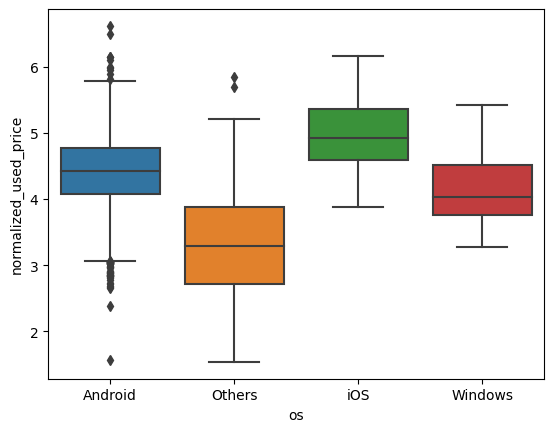

In [67]:
# Plot the boxplot between os and normalized_used_price.
df["os"].value_counts()

sns.boxplot(x = "os", y ="normalized_used_price", data = df)
# os is a predictor

In [68]:
df['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

In [69]:
# To create dataframe variable containing only the column drive-wheels and price
df_group_os = df[["os", "normalized_used_price"]]

# To create the group by the variable drive-wheels
group_os = df_group_os.groupby(["os"])

#Group Each
Android = group_os.get_group("Android")["normalized_used_price"]
Others = group_os.get_group("Others")["normalized_used_price"]
iOS = group_os.get_group("iOS")["normalized_used_price"]
Windows = group_os.get_group("Windows")["normalized_used_price"]

In [70]:
# ANOVA
f_value, p_value = stats.f_oneway(Android, Others, iOS, Windows)

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  196.63775204281703 P = 1.0001282504638895e-117


In [71]:
df["os"].value_counts().to_frame()

,count
os,
Android,3214
Others,137
Windows,67
iOS,36


In [72]:
# ANOVA
f_value, p_value = stats.f_oneway(Android, Others)

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  535.1968618352637 P = 5.68246152544234e-110


In [73]:
# ANOVA
f_value, p_value = stats.f_oneway(Android, Windows)

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  14.805612207822014 P = 0.00012145015311603946


In [74]:
# ANOVA
f_value, p_value = stats.f_oneway(Android, iOS)

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  37.67206738703718 P = 9.38101829794889e-10


In [75]:
# ANOVA
f_value, p_value = stats.f_oneway(Others, iOS)

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  144.40255154242755 P = 1.6585200223076645e-24


In [76]:
# ANOVA
f_value, p_value = stats.f_oneway(Others, Windows)

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  66.85801965519728 P = 3.186877719350955e-14


In [77]:
# ANOVA
f_value, p_value = stats.f_oneway(iOS, Windows)

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  58.59756903191779 P = 1.1876506876136352e-11


<h1>Analysis For 4G</h1>

<Axes: xlabel='4g', ylabel='normalized_used_price'>

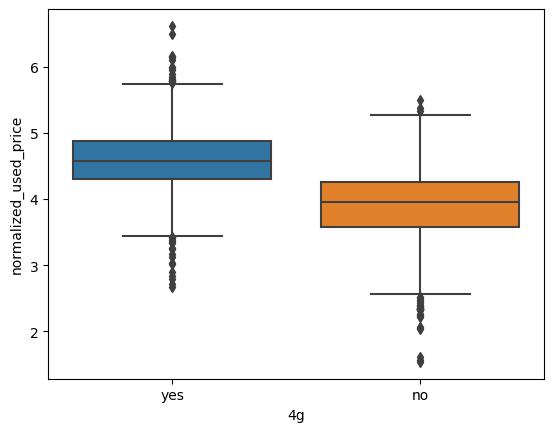

In [78]:
# Plot the boxplot between 4g and normalized_used_price.
df["4g"].value_counts()

sns.boxplot(x = "4g", y ="normalized_used_price", data = df)
# 4g is a predictor

In [79]:
# To create dataframe variable containing only the column drive-wheels and price
df_group_4g = df[["4g", "normalized_used_price"]]

# To create the group by the variable drive-wheels
group_4g = df_group_4g.groupby(["4g"])

# ANOVA
f_value, p_value = stats.f_oneway(group_4g.get_group("yes")["normalized_used_price"], group_4g.get_group("no")["normalized_used_price"])

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  1502.2387189514893 P = 3.729945525818113e-273


In [80]:
df["4g"].value_counts().to_frame()

,count
4g,
yes,2335
no,1119


<h1>Analysis For 5G</h1>

<Axes: xlabel='5g', ylabel='normalized_used_price'>

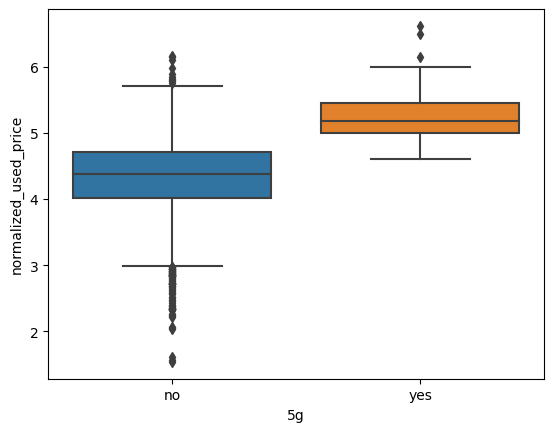

In [81]:
# Plot the boxplot between 5g and normalized_used_price.
df["5g"].value_counts()

sns.boxplot(x = "5g", y ="normalized_used_price", data = df)
# 5g is a predictor

In [82]:
# To create dataframe variable containing only the column 5g and price
df_group_5g = df[["5g", "normalized_used_price"]]

# To create the group by the variable 5g
group_5g = df_group_5g.groupby(["5g"])

# ANOVA
f_value, p_value = stats.f_oneway(group_5g.get_group("no")["normalized_used_price"], group_5g.get_group("yes")["normalized_used_price"])

# To display the results    
print("ANOVA Results: F = ", f_value, "P =", p_value)

ANOVA Results: F =  376.6218141257634 P = 1.0331727115127354e-79


In [83]:
df["5g"].value_counts().to_frame()

,count
5g,
no,3302
yes,152


<h1>DROPPING DATA</h1>

In [84]:
df = df.drop(['internal_memory', 'weight', 'release_year', 'days_used'], axis=1)
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,ram,battery,normalized_used_price,normalized_new_price
0,budget,Android,0.472159,yes,no,0.270833,0.15625,0.250000,0.310700,4.307572,4.715100
1,budget,Android,0.563334,yes,yes,0.270833,0.50000,0.666667,0.442387,5.162097,5.519018
2,budget,Android,0.543471,yes,yes,0.270833,0.25000,0.666667,0.432099,5.111084,5.884631
3,budget,Android,0.830348,yes,yes,0.270833,0.25000,0.500000,0.745885,5.135387,5.630961
4,budget,Android,0.498860,yes,no,0.270833,0.25000,0.250000,0.514403,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...
3449,expensive,Android,0.499512,yes,no,0.270833,0.25000,0.500000,0.514403,4.492337,6.483872
3450,expensive,Android,0.496255,yes,no,0.270833,0.25000,0.666667,0.411523,5.037732,6.251538
3451,budget,Android,0.514490,yes,no,0.270833,0.15625,0.250000,0.411523,4.357350,4.528829
3452,budget,Android,0.514490,yes,no,0.270833,0.15625,0.166667,0.411523,4.349762,4.624188


<h1>DUMMY VARIABLE</h1>

In [85]:
dummy_1 = pd.get_dummies(df['os'], dtype = int)
dummy_1.rename(columns = {'Android':'OS_Android' ,  'iOS':'OS_iOS', 'Windows':'OS_Windows', 'Others':'OS_Others'},inplace = True)

dummy_1.head(10)

,OS_Android,OS_Others,OS_Windows,OS_iOS
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [86]:
# Merge data frame "df" and "dummy_1" 
df = pd.concat([df, dummy_1], axis = 1)

# Drop original column "os" from "df"
df.drop("os", axis = 1, inplace = True)
df.head(10)

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,ram,battery,normalized_used_price,normalized_new_price,OS_Android,OS_Others,OS_Windows,OS_iOS
0,budget,0.472159,yes,no,0.270833,0.15625,0.250000,0.310700,4.307572,4.715100,1,0,0,0
1,budget,0.563334,yes,yes,0.270833,0.50000,0.666667,0.442387,5.162097,5.519018,1,0,0,0
2,budget,0.543471,yes,yes,0.270833,0.25000,0.666667,0.432099,5.111084,5.884631,1,0,0,0
3,budget,0.830348,yes,yes,0.270833,0.25000,0.500000,0.745885,5.135387,5.630961,1,0,0,0
4,budget,0.498860,yes,no,0.270833,0.25000,0.250000,0.514403,4.389995,4.947837,1,0,0,0
5,budget,0.528492,yes,no,0.270833,0.25000,0.333333,0.411523,4.413889,5.060694,1,0,0,0
6,budget,0.450668,yes,no,0.166667,0.15625,0.166667,0.310700,3.878259,4.518958,1,0,0,0
7,budget,0.513514,yes,no,0.270833,0.25000,0.333333,0.349794,4.729421,5.188726,1,0,0,0
8,budget,0.498860,yes,no,0.270833,0.50000,0.500000,0.411523,4.886054,5.299916,1,0,0,0
9,budget,0.528492,yes,no,0.270833,0.25000,0.500000,0.411523,4.773224,5.073610,1,0,0,0


In [87]:
dummy_2 = pd.get_dummies(df['4g'], dtype = int)

dummy_2.rename(columns = {'no':'without_4g' ,  'yes':'with_4g'},inplace = True)
dummy_2.head(10)

,without_4g,with_4g
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [88]:
# Merge data frame "df" and "dummy_2" 
df = pd.concat([df, dummy_2], axis = 1)

# Drop original column "4g" from "df"
df.drop("4g", axis = 1, inplace = True)
df.head(10)

,device_brand,screen_size,5g,rear_camera_mp,front_camera_mp,ram,battery,normalized_used_price,normalized_new_price,OS_Android,OS_Others,OS_Windows,OS_iOS,without_4g,with_4g
0,budget,0.472159,no,0.270833,0.15625,0.250000,0.310700,4.307572,4.715100,1,0,0,0,0,1
1,budget,0.563334,yes,0.270833,0.50000,0.666667,0.442387,5.162097,5.519018,1,0,0,0,0,1
2,budget,0.543471,yes,0.270833,0.25000,0.666667,0.432099,5.111084,5.884631,1,0,0,0,0,1
3,budget,0.830348,yes,0.270833,0.25000,0.500000,0.745885,5.135387,5.630961,1,0,0,0,0,1
4,budget,0.498860,no,0.270833,0.25000,0.250000,0.514403,4.389995,4.947837,1,0,0,0,0,1
5,budget,0.528492,no,0.270833,0.25000,0.333333,0.411523,4.413889,5.060694,1,0,0,0,0,1
6,budget,0.450668,no,0.166667,0.15625,0.166667,0.310700,3.878259,4.518958,1,0,0,0,0,1
7,budget,0.513514,no,0.270833,0.25000,0.333333,0.349794,4.729421,5.188726,1,0,0,0,0,1
8,budget,0.498860,no,0.270833,0.50000,0.500000,0.411523,4.886054,5.299916,1,0,0,0,0,1
9,budget,0.528492,no,0.270833,0.25000,0.500000,0.411523,4.773224,5.073610,1,0,0,0,0,1


In [89]:
dummy_3 = pd.get_dummies(df['5g'], dtype = int)
dummy_3.rename(columns = {'no':'without_5g' ,  'yes':'with_5g'},inplace = True)
dummy_3.head(10)

,without_5g,with_5g
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [90]:
# Merge data frame "df" and "dummy_2" 
df = pd.concat([df, dummy_3], axis = 1)

# Drop original column "5g" from "df"
df.drop("5g", axis = 1, inplace = True)
df.head(10)

,device_brand,screen_size,rear_camera_mp,front_camera_mp,ram,battery,normalized_used_price,normalized_new_price,OS_Android,OS_Others,OS_Windows,OS_iOS,without_4g,with_4g,without_5g,with_5g
0,budget,0.472159,0.270833,0.15625,0.250000,0.310700,4.307572,4.715100,1,0,0,0,0,1,1,0
1,budget,0.563334,0.270833,0.50000,0.666667,0.442387,5.162097,5.519018,1,0,0,0,0,1,0,1
2,budget,0.543471,0.270833,0.25000,0.666667,0.432099,5.111084,5.884631,1,0,0,0,0,1,0,1
3,budget,0.830348,0.270833,0.25000,0.500000,0.745885,5.135387,5.630961,1,0,0,0,0,1,0,1
4,budget,0.498860,0.270833,0.25000,0.250000,0.514403,4.389995,4.947837,1,0,0,0,0,1,1,0
5,budget,0.528492,0.270833,0.25000,0.333333,0.411523,4.413889,5.060694,1,0,0,0,0,1,1,0
6,budget,0.450668,0.166667,0.15625,0.166667,0.310700,3.878259,4.518958,1,0,0,0,0,1,1,0
7,budget,0.513514,0.270833,0.25000,0.333333,0.349794,4.729421,5.188726,1,0,0,0,0,1,1,0
8,budget,0.498860,0.270833,0.50000,0.500000,0.411523,4.886054,5.299916,1,0,0,0,0,1,1,0
9,budget,0.528492,0.270833,0.25000,0.500000,0.411523,4.773224,5.073610,1,0,0,0,0,1,1,0


In [91]:
dummy_4 = pd.get_dummies(df['device_brand'], dtype = int)
dummy_3.rename(columns = {'budget':'budget_brand' ,  'expensive':'expensive_brand'},inplace = True)
dummy_4

,budget,expensive
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3449,0,1
3450,0,1
3451,1,0
3452,1,0


In [92]:
# Merge data frame "df" and "dummy_2" 
df = pd.concat([df, dummy_4], axis = 1)

# Drop original column "5g" from "df"
df.drop("device_brand", axis = 1, inplace = True)
df.head(10)

,screen_size,rear_camera_mp,front_camera_mp,ram,battery,normalized_used_price,normalized_new_price,OS_Android,OS_Others,OS_Windows,OS_iOS,without_4g,with_4g,without_5g,with_5g,budget,expensive
0,0.472159,0.270833,0.15625,0.250000,0.310700,4.307572,4.715100,1,0,0,0,0,1,1,0,1,0
1,0.563334,0.270833,0.50000,0.666667,0.442387,5.162097,5.519018,1,0,0,0,0,1,0,1,1,0
2,0.543471,0.270833,0.25000,0.666667,0.432099,5.111084,5.884631,1,0,0,0,0,1,0,1,1,0
3,0.830348,0.270833,0.25000,0.500000,0.745885,5.135387,5.630961,1,0,0,0,0,1,0,1,1,0
4,0.498860,0.270833,0.25000,0.250000,0.514403,4.389995,4.947837,1,0,0,0,0,1,1,0,1,0
5,0.528492,0.270833,0.25000,0.333333,0.411523,4.413889,5.060694,1,0,0,0,0,1,1,0,1,0
6,0.450668,0.166667,0.15625,0.166667,0.310700,3.878259,4.518958,1,0,0,0,0,1,1,0,1,0
7,0.513514,0.270833,0.25000,0.333333,0.349794,4.729421,5.188726,1,0,0,0,0,1,1,0,1,0
8,0.498860,0.270833,0.50000,0.500000,0.411523,4.886054,5.299916,1,0,0,0,0,1,1,0,1,0
9,0.528492,0.270833,0.25000,0.500000,0.411523,4.773224,5.073610,1,0,0,0,0,1,1,0,1,0


In [93]:
df.to_csv('ECEN E3_Group 15_MP1 Part1_DW and EDA.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'ECEN E3_Group 15_MP1 Part1_DW and EDA.csv'